In [2]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

In [3]:
ROOT_PATH = "../../../desarrollo/"

csv_file = ROOT_PATH + "Data/Annotations/audio_annotations.csv"

audio_name = "AM11_20230304_103000.WAV"

In [4]:
# Load image from audio
image_name = audio_name.replace(".WAV", "")

# Define the root path for the Images directory
image_root_directory = ROOT_PATH + "Data/Dataset/images/"

In [5]:
# Read the CSV file
df = pd.read_csv(csv_file)

# Filter rows that match the given audio name
filtered_df = df[df['path'].str.contains(audio_name)]

# Delete indexes from the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

In [6]:
filtered_df

path annotator recorder        date  \
0   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
1   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
2   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
3   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
4   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
5   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
6   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
7   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
8   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
9   AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
10  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
11  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
12  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
13  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
14  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
15  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
16  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
17  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
18  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
19  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
20  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
21  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   
22  AM11/2023_03_04/AM11_20230304_103000.WAV       Edu     AM11  2023/03/04   

        time audio_duration  start_time   end_time  low_frequency  \
0   10:30:00       00:01:00    7.456076   8.663982    1873.371948   
1   10:30:00       00:01:00    2.918202   4.233163    2212.671875   
2   10:30:00       00:01:00   11.722182  12.984993    2212.671875   
3   10:30:00       00:01:00   38.378477  38.526720    2792.631780   
4   10:30:00       00:01:00   20.457540  20.825350    2807.317139   
5   10:30:00       00:01:00   55.629575  56.623353    3031.380371   
6   10:30:00       00:01:00   50.545388  51.610542    1871.599835   
7   10:30:00       00:01:00   46.756955  47.695827    2248.970703   
8   10:30:00       00:01:00   45.790630  46.092606    2004.071411   
9   10:30:00       00:01:00   44.214861  44.626647    1937.912354   
10  10:30:00       00:01:00   42.644583  43.440703    2764.145752   
11  10:30:00       00:01:00   41.963763  42.122987    3073.967387   
12  10:30:00       00:01:00   40.168375  40.305637    2807.317139   
13  10:30:00       00:01:00   37.066252  37.184967    2895.281006   
14  10:30:00       00:01:00   35.416360  36.610542    1630.619263   
15  10:30:00       00:01:00   31.696559  35.325769    2476.463623   
16  10:30:00       00:01:00   29.972548  31.408309    5056.136230   
17  10:30:00       00:01:00   29.379575  29.491525    2360.603760   
18  10:30:00       00:01:00   28.308931  28.424231    2516.049561   
19  10:30:00       00:01:00   27.238287  27.353587    2527.880199   
20  10:30:00       00:01:00   23.965959  28.695652    1689.071411   
21  10:30:00       00:01:00   23.729868  24.899341    1905.442017   
22  10:30:00       00:01:00   16.433016  17.640922    2037.770264   

    high_frequency             specie  
0      7855.705078  saxicola rubicola  
1      8515.720703  saxicola rubicola  
2      7145.192871  saxicola rubicola  
3      5180.716106  passer domesticus  
4      5655.683594  saxicola rubicola  
5      7145.192871  saxicola rubicola  
6      6854.439007  saxicola rubicola  
7      7022.555030  saxicola rubicola  
8      5896.277832    sturnus uni/vul  
9      5815.084473    sturnus uni/vul  
10     7341.949219  saxicola rubicola  
11    

In [7]:
# Function to convert HH:MM:SS format to seconds
def hms_to_seconds(hms):
    if isinstance(hms, str):
        time_parts = hms.split(':')
        if len(time_parts) == 3:
            hours, minutes, seconds = map(int, time_parts)
            total_seconds = hours * 3600 + minutes * 60 + seconds
            return total_seconds
    elif isinstance(hms, float):
        return float(hms)
    return None

In [8]:
filtered_df["path"][0].replace(".WAV", ".PNG")

'AM11/2023_03_04/AM11_20230304_103000.PNG'

In [9]:
image_path = ROOT_PATH + "Data/Dataset/images/"
print(image_path)

../../../desarrollo/Data/Dataset/images/


AM11_20230304_103000.WAV


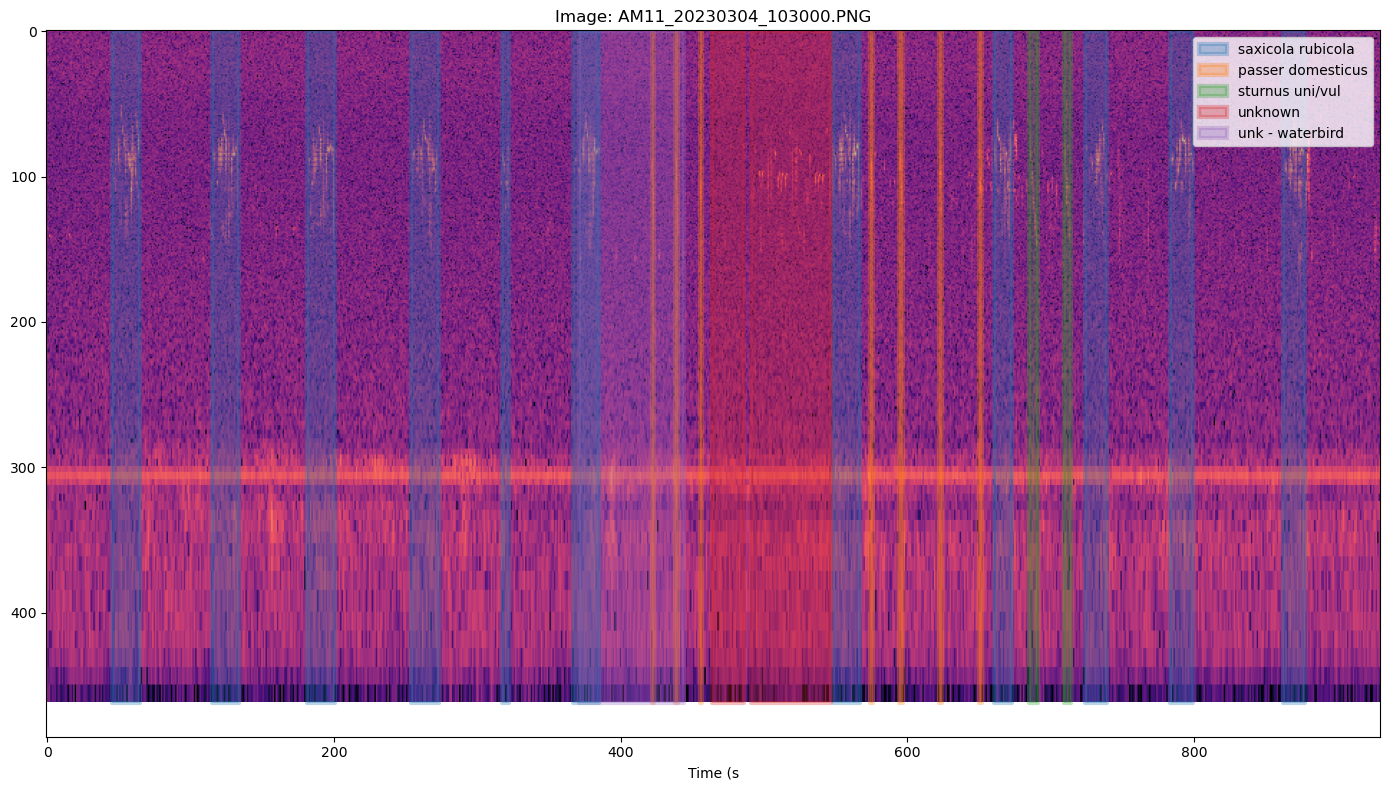

Image shape: (462, 930, 4)
Image size: 587 KB
Image resolution: 1400x800 pixels


In [10]:
# Function to load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    print(audio_name)
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])
            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[0, img.shape[0]], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    #ax.legend(loc='best')
    ax.set_xlabel('Time (s')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print image compression
    print(f'Image shape: {img.shape}')
    print(f'Image size: {os.path.getsize(image_path) / 1024:.0f} KB')

    # Print images resolution
    dpi = fig.get_dpi()
    width, height = fig.get_size_inches()
    print(f'Image resolution: {width * dpi:.0f}x{height * dpi:.0f} pixels')

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)


In [11]:
'''sample_audio = ROOT_PATH + "Data/Dataset/Audios/" + filtered_df["path"][0]

# Cargar el archivo de audio y obtener la frecuencia de muestreo
y, sr = librosa.load(sample_audio, sr=None)

# Imprimir la frecuencia de muestreo
print("Frecuencia de muestreo:", sr, "Hz")'''

MIN_FREQUENCY = 1
MAX_FREQUENCY = 16000

In [12]:
image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
img = plt.imread(image_path)
print(img.shape[0])

462


115 134 33.949526594211136 102.36414275869379
45 65 30.099317219498857 94.41970552834437
181 201 38.47392197867623 94.41970552834437
594 597 53.817528500275955 83.30997096620035
317 322 49.631150956109536 83.05965838516664
862 877 38.47392197867623 79.39486808286188
783 799 40.456601467727694 102.40931005291924
724 739 39.30018002867325 93.6431212578371
709 714 47.64288956608988 99.14549030314708
685 691 48.30465066031155 100.74761545041696
660 673 37.17747751138836 83.79929198556363
650 652 50.961737979657016 78.72905085389266
622 624 52.29650003388184 83.05965838516664
574 576 52.29650003388184 81.58718594886938
548 567 37.17747751138836 108.98750445844257
491 547 43.036968221629536 89.04433537991423
464 486 49.76489734804005 54.979201987172246
455 457 56.32741397820433 91.33106664278972
438 440 54.306849524528445 88.28748156930266
422 423 56.32741397820433 88.06359857194542
371 444 97.55717130019491 107.30665458781681
367 385 33.949526594211136 101.55404768656473
254 273 37.82531768

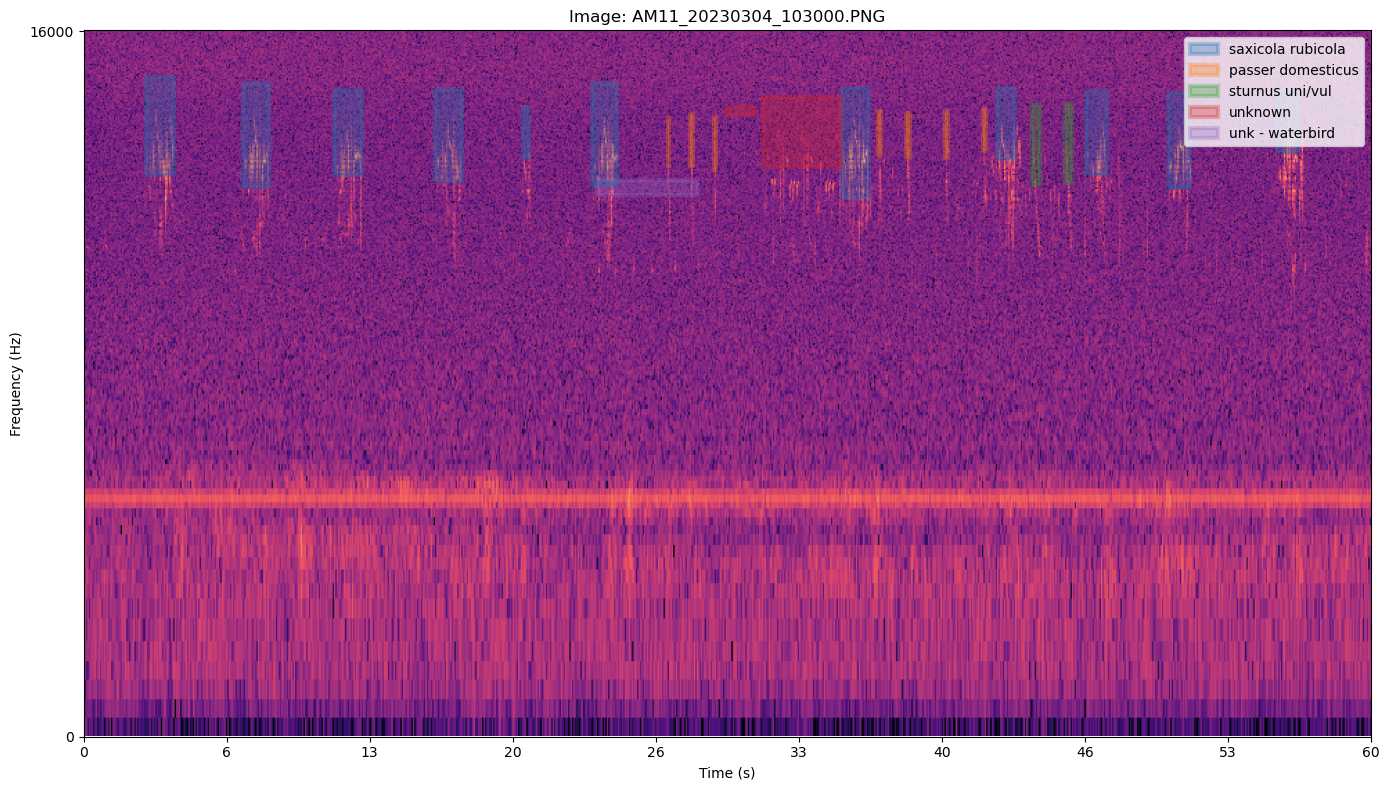

In [13]:
import numpy as np
import math

# Load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        low_frequency = row['low_frequency']
        high_frequency = row['high_frequency']
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])

            # Calculate vertical coordinates based on frequency range (0 to MAX_FREQUENCY)
            if low_frequency == 0:
                bottom = 0
            else:
                # bottom = float(((2595 * math.log(1 + (low_frequency/700), 10))) * img.shape[0])
                bottom = float(np.log(low_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            if high_frequency == MAX_FREQUENCY:
                top = MAX_FREQUENCY
            else:
                # top = float(((2595 * math.log(1 + (high_frequency/700), 10))) * img.shape[0])
                top = float(np.log(high_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            # Invert the y-coordinates
            bottom, top = img.shape[0] - top, img.shape[0] - bottom

            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[bottom, top], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

            print(start, end, bottom, top)
    
    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

    # Customize y-axis ticks and labels for frequency
    freq_ticks = [0, MAX_FREQUENCY]
    freq_labels = [str(tick) for tick in freq_ticks]
    ax.set_yticks([int(tick / MAX_FREQUENCY * img.shape[0]) for tick in freq_ticks])
    ax.set_yticklabels(np.flipud(freq_labels))  # Invert the frequency labels

    # Customize x-axis
    ax.set_xlim([0, 60])
    ax.set_xticks(np.linspace(0, img.shape[1], num=10))
    ax.set_xticklabels([str(int(tick / img.shape[1] * audio_duration)) for tick in ax.get_xticks()])

    # Show the plot
    plt.tight_layout()
    plt.show()

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)


115 134 33.949526594211136 102.36414275869379
45 65 30.099317219498857 94.41970552834437
181 201 38.47392197867623 94.41970552834437
594 597 53.817528500275955 83.30997096620035
317 322 49.631150956109536 83.05965838516664
862 877 38.47392197867623 79.39486808286188
783 799 40.456601467727694 102.40931005291924
724 739 39.30018002867325 93.6431212578371
709 714 47.64288956608988 99.14549030314708
685 691 48.30465066031155 100.74761545041696
660 673 37.17747751138836 83.79929198556363
650 652 50.961737979657016 78.72905085389266
622 624 52.29650003388184 83.05965838516664
574 576 52.29650003388184 81.58718594886938
548 567 37.17747751138836 108.98750445844257
491 547 43.036968221629536 89.04433537991423
464 486 49.76489734804005 54.979201987172246
455 457 56.32741397820433 91.33106664278972
438 440 54.306849524528445 88.28748156930266
422 423 56.32741397820433 88.06359857194542
371 444 97.55717130019491 107.30665458781681
367 385 33.949526594211136 101.55404768656473
254 273 37.82531768

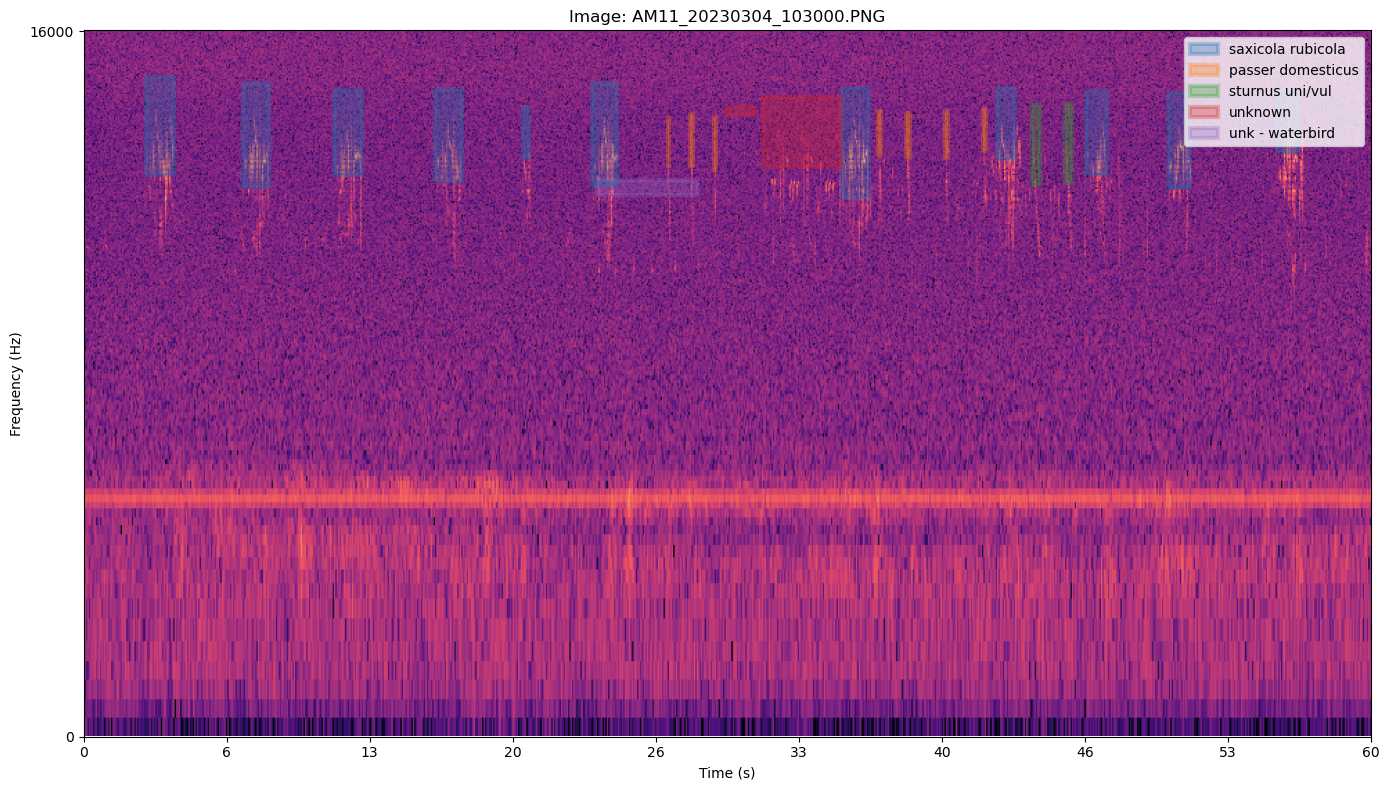

In [14]:
audio_name = "AM11_20230304_103000.WAV"

# Load image from audio
image_name = audio_name.replace(".WAV", "")

# Define the root path for the Images directory
image_root_directory = ROOT_PATH + "Data/Dataset/images/"

# Filter rows that match the given audio name
filtered_df = df[df['path'].str.contains(audio_name)]

# Delete indexes from the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

image_path = ROOT_PATH + "Data/Dataset/images/" + filtered_df["path"][0].replace(".WAV", ".PNG")

load_and_display_image(image_path, df)

In [96]:
# List image files in the Images directory
image_files = [os.path.join(image_root_directory, file) for file in os.listdir(image_root_directory) if file.endswith('.jpg')]

# Display each image along with annotations
for image_path in image_files:
    load_and_display_image(image_path, df)